## Sampling

- What's the average salary of the individuals in our company working in IT roles? (Assign either 'population' or 'sample' to the variable question1.)
- What's the proportion of individuals in the IT department having salaries under \$60000? (Assign either 'population' or 'sample' to the variable question2.)
- What's the minimum salary in the entire company? (Assign either 'population' or 'sample' to the variable question3.)
- What's the minimum salary in the IT department of our company? (Assign either 'population' or 'sample' to the variable question4.)
- What's the proportion of salaries under $20000 in the entire company? (Assign either 'population' or 'sample' to the variable question5.)

In [1]:
question1 = 'population'
question2 = 'population'
question3 = 'sample'
question4 = 'population'
question5 = 'sample'

- Get familiar with the data set.
    - Print the first five rows using DataFrame.head() and the last five rows with DataFrame.tail().
    - Find the number of rows and columns using DataFrame.shape.
- Take one measure of the sampling error.
    - Use the Games Played column to find the maximum number of games played by a player in the season 2016-2017. The data set contains all the players that had at least one game, so it's a population relative to our question. Find this parameter, and assign the result to a variable named parameter.
    - Using the Series.sample() method, sample randomly 30 players from the population, and assign the result to a variable named sample.
    - When calling Series.sample(), use the the argument random_state = 1. This makes your results reproducible and helps us with the answer checking (we'll discuss more about this in the next screen).
    - Find the maximum number of games using the sample, and assign the result to a variable named statistic.
    - Measure the sampling error, and assign the result to a variable named sampling_error.

In [36]:
import pandas as pd

wnba = pd.read_csv('wnba.csv')

In [3]:
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [4]:
wnba.tail()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
138,Tiffany Hayes,ATL,G,178,70.0,22.093170,US,"September 20, 1989",27,Connecticut,...,28,89,117,69,37,8,50,467,0,0
139,Tiffany Jackson,LA,F,191,84.0,23.025685,US,"April 26, 1985",32,Texas,...,5,18,23,3,1,3,8,28,0,0
140,Tiffany Mitchell,IND,G,175,69.0,22.530612,US,"September 23, 1984",32,South Carolina,...,16,70,86,39,31,5,40,277,0,0
141,Tina Charles,NY,F/C,193,84.0,22.550941,US,"May 12, 1988",29,Connecticut,...,56,212,268,75,21,22,71,582,11,0
142,Yvonne Turner,PHO,G,175,59.0,19.265306,US,"October 13, 1987",29,Nebraska,...,11,13,24,30,18,1,32,151,0,0


In [5]:
wnba.shape

(143, 32)

In [6]:
parameter = wnba["Games Played"].max()
sample = wnba["Games Played"].sample(30, random_state=1)
statistic = sample.max()
sampling_error = parameter - statistic

sampling_error

2

- Let's visualize the discrepancy between a parameter and its corresponding statistics in the case of simple random sampling.
    - Using simple random sampling, take 100 samples from our WNBA data set, and for each sample measure the average points scored by a player during the 2016-2017 season. For each of the 100 iterations of a for loop:
        - Sample 10 values from the PTS column.
        - Compute the mean of this sample made of 10 values from the PTS column, and append the result to a list.
        - To make your results reproducible, vary the random_state parameter of the sample() method with values between 0 and 99. For the first iteration of the for loop, random_state should equal 0, for the second iteration should equal 1, for the third should equal 2, and so on.
    - Display the discrepancy between the parameter of interest (the mean of the PTS column) and the statistics obtained in the previous step.
        - Using plt.scatter(), display all the 100 sample means using a scatter plot. For the x-axis, use integers from 1 to 100 to designate the sample number. Use the y-axis for the sample means.
        - Using plt.axhline(), draw a horizontal line that represents the average number of points in the population.


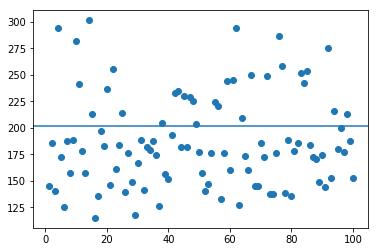

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

wnba = pd.read_csv('wnba.csv')

PTS_mean_samples = []
for i in range(100):
    PTS_mean = wnba["PTS"].sample(10, random_state=i).mean()
    PTS_mean_samples.append(PTS_mean)

PTS_mean_population = wnba["PTS"].mean()

plt.scatter(range(1,101), PTS_mean_samples)
plt.axhline(PTS_mean_population);

- Perform stratified sampling: stratify the data set by player position, and then do simple random sampling on every stratum. At the end, use the sample to find which position has the greatest number of points per game.
    - Create a new column which describes the number of points a player scored per game during the season. The number of total points a player scored the entire season is stored in the PTS column, and the number of games played in the Games Played column. Give the new column a relevant name.
    - Stratify the wnba data set by player position. The Pos column describes a player's position on the field. Assign each stratum to a different variable.
    - Loop through the strata, and for each stratum:
        - Sample 10 observations using simple random sampling (set random_state = 0).
        - Find the mean points per game using the sample. Use the new column you've created earlier.
        - Find a way to store the mean along with its corresponding position. You can use a dictionary.
    - Find the position that has the greatest number of points per game, and assign its name to a variable named position_most_points.


In [8]:
wnba["PSG"] = wnba["PTS"]/wnba["Games Played"]
G_pos = wnba[wnba.Pos == "G"]
F_pos = wnba[wnba.Pos == "F"]
C_pos = wnba[wnba.Pos == "C"]
GF_pos = wnba[wnba.Pos == "G/F"]
FC_pos = wnba[wnba.Pos == "F/C"]


points_per_position = {}
for stratum, position in [(G_pos, "G"), (F_pos, "F"), (C_pos, "C"), (GF_pos, "G/F"), (FC_pos, "F/C")]:
    sample = stratum["PSG"].sample(10, random_state=0)
    points_per_position[position] = sample.mean()

position_most_points = max(points_per_position, key = points_per_position.get)

position_most_points

'C'

- Perform quota sampling on the data set 100 times, and try to understand the entire sampling process with the help of a scatter plot.
    - Stratify the data set by the number of games played in the following way: the first strata should be composed of players that played 12 games or less; the second of players that played more than 12 games, but up to 22 (included); and the third of players that played more than 22 games (22 not included).
    - Perform quota sampling 100 times. For each of the 100 iterations of a for loop:
        - Sample proportionally from each stratum using simple random sampling. Sample at random: one sample observation from the first stratum, two sample observations from the second, and seven sample observations from the third stratum.
        - random_state should vary from 0 to 99: 0 for the first iteration, 99 for the last iteration.
        - Once you're done with the sampling for the current iteration of the loop, concatenate all the sample observations into one final sample. You can use pd.concat().
        - Compute the mean of the final sample, and append it to a list defined outside the loop. The mean should be for the PTS column.
    - Display the entire sampling process.
        - Using plt.scatter(), display the sampling means on a scatter plot. Place the means on the y-axis, and the sample numbers on the x-axis (the numbers should range from 1 to 100 - both endpoints included).
        - Using plt.axhline(), display the population mean for the total points in the form of a horizontal line.

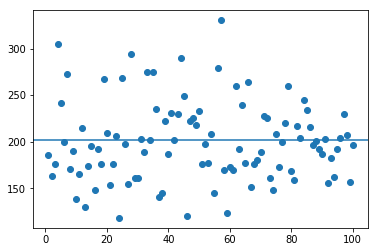

In [9]:
under_12 = wnba[wnba["Games Played"] <= 12]
btw_13_22 = wnba[(wnba["Games Played"] > 12) & (wnba["Games Played"] <= 22)]
over_23 = wnba[wnba["Games Played"] > 22]

quota_sampling_means = []
for i in range(100):
    sample_under_12 = under_12["PTS"].sample(1, random_state=i)
    sample_btw_13_22 = btw_13_22["PTS"].sample(2, random_state=i)
    sample_over_23 = over_23["PTS"].sample(7, random_state=i)
    
    final_sample = pd.concat([sample_under_12, sample_btw_13_22, sample_over_23])
    quota_sampling_means.append(final_sample.mean())

plt.scatter(range(1, 101), quota_sampling_means)
plt.axhline(wnba["PTS"].mean());

- Let's simulate a cluster sampling on our data set.
    - Pick four team clusters randomly using the technique we've learned (use random_state = 0).
    - Collect the data from each cluster without sampling the clusters. Create a new DataFrame object that stores the data collected from all clusters.
    - Use the data collected to estimate the mean for the following player attributes:
        - Height;
        - Age;
        - BMI;
        - Total points.
    - Finally, measure the sampling error of your estimates, and assign the errors to the following variables: sampling_error_height, sampling_error_age, sampling_error_BMI, sampling_error_points.



In [10]:
clusters = pd.Series(wnba['Team'].unique()).sample(4, random_state = 0)

sample = pd.DataFrame()

for cluster in clusters:
    data_collected = wnba[wnba['Team'] == cluster]
    sample = sample.append(data_collected)

sampling_error_height = wnba['Height'].mean() - sample['Height'].mean()
sampling_error_age = wnba['Age'].mean() - sample['Age'].mean()
sampling_error_BMI = wnba['BMI'].mean() - sample['BMI'].mean()
sampling_error_points = wnba['PTS'].mean() - sample['PTS'].mean()

## Variables in Statistics

- We've selected a few variables from our data set. For each of the variables selected, indicate whether it's quantitative or qualitative.
    - We've already created a dictionary named variables. Each variable name is given as dictionary key.
    - If a variable is quantitative, then complete the value of the corresponding key with the string 'quantitative'. If the variable is qualitative, the use the string 'qualitative'.

In [11]:
variables = {'Name': 'qualitative', 'Team': 'qualitative', 'Pos': 'qualitative',
             'Height': 'quantitative', 'BMI': 'quantitative',
             'Birth_Place': 'qualitative', 'Birthdate': 'quantitative', 'Age': 'quantitative', 
             'College': 'qualitative', 'Experience': 'quantitative', 'Games Played': 'quantitative',
             'MIN': 'quantitative', 'FGM': 'quantitative', 'FGA': 'quantitative',
             '3PA': 'quantitative', 'FTM': 'quantitative',
             'FTA': 'quantitative', 'FT%': 'quantitative', 'OREB': 'quantitative', 'DREB': 'quantitative',
             'REB': 'quantitative', 'AST': 'quantitative', 'PTS': 'quantitative'}

- Inspect the data set, and find the variables measured on a nominal scale. In the code editor:
    - Add the variables measured on a nominal scale to a list named nominal_scale, and sort the elements in the list alphabetically (the sorting helps us with answer checking).
    - Notice that we've added a new variable named Height_labels. Instead of showing the height in centimeters, the new variable shows labels like "short", "medium", or "tall". By considering the principles that characterizes the nominal scale, think whether the new Height_labels variable should be included in your nominal_scale list.

In [12]:
nominal_scale = sorted(['Name', 'Team', 'Pos', 'Birth_Place', 'College'])

- Consider the following sentences, and evaluate their truth value. If the sentence is true, than assign True to the corresponding variable (programming variable) in the code editor, otherwise assign False. Make sure you assign boolean values as answers, not strings.
    1. Using the Height_labels variable only, we can tell whether player Kiah Stokes is taller than Riquna Williams. Assign your answer to a variable named question1.
    2. We can measure the height difference between Kiah Stokes and Riquna Williams using the Height_labels variable. Assign your answer to question2.
    3. The Height_labels and the College variables are both measured on an ordinal scale. Assign your answer to question3.
    4. The Games Played variable is not measured on an ordinal scale. Assign your answer to question4.
    5. The Experience variable is measured on an ordinal scale. Assign your answer to question5.
    6. The Height_labels variable is qualitative because is measured using words. Assign your answer to question6.

In [13]:
question1 = True
question2 = False
question3 = False
question4 = True
question5 = False
question6 = False

- Examine the various variables of the data set, and find the ones that are measured on an interval or ratio scale.
    - For the variables measured on a interval scale, add their names as a string to a list named interval. Sort the list alphabetically.
    - For the variables measured on a ratio scale, add their names as a string to a list named ratio. Sort the list alphabetically.
    - We've also added the Weight_deviation variable to the dataset, so make sure you include that one too in one the lists.

In [14]:
interval = ["Birthdate", "Weight_deviation"]
ratio = sorted(['Height', 'Weight', 'BMI', 'Age', 'Experience', 'Games Played', 'MIN', 'FGM', 'FGA', 'FG%', '15:00', 
                '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO',
                'PTS', 'DD2', 'TD3'])

- For every variable, indicate whether is continuous or discrete.
    - In the code editor, we've already extracted for you the names of the variables that are measured on ratio and interval scales. Every variable name is registered as a dictionary key.
    - If a variable is discrete, then assign the string 'discrete' to its corresponding dictionary key.
    - If a variable is continuous, then assign the string 'continuous' to its corresponding dictionary key.

In [15]:
ratio_interval_only = {'Height': 'continuous', 'Weight': 'continuous', 'BMI': 'continuous', 'Age': 'continuous',
                       'Games Played': 'discrete', 'MIN': 'continuous', 'FGM': 'discrete',
                       'FGA': 'discrete', 'FG%': 'continuous', '3PA': 'discrete', '3P%': 'continuous',
                       'FTM': 'discrete', 'FTA': 'discrete', 'FT%': 'continuous', 'OREB': 'discrete',
                       'DREB': 'discrete', 'REB': 'discrete', 'AST': 'discrete', 'STL': 'discrete',
                       'BLK': 'discrete', 'TO': 'discrete', 'PTS': 'discrete', 'DD2': 'discrete', 
                       'TD3': 'discrete', 'Weight_deviation': 'continuous'}

- Find the real limits for five values of the BMI (body mass index) variable.
    - We've already extracted for you the first five BMI values in the data set, and stored them as dictionary keys in a dictionary named bmi.
    - For every BMI value write its real limits in a list and make the list a dictionary value that should correspond to the right dictionary key. The lower real limits should come first in each list. For example:

In [16]:
bmi = {21.200991370000001: [21.2009913700000005, 21.2009913700000015],
 21.329437550000002: [21.3294375500000015, 21.3294375500000025],
 23.875432530000001: [23.8754325300000005, 23.8754325300000015],
 24.543462380000001: [24.5434623800000005, 24.5434623800000015],
 25.46938776: [25.469387755, 25.469387765]}

## Frequency Distributions

- Using the Series.value_counts() method, generate frequency distribution tables for the following columns:
    - Pos. Assign the frequency distribution table to a variable named freq_distro_pos.
    - Height. Assign the frequency distribution table to a variable named freq_distro_height.

In [17]:
freq_distro_pos = wnba["Pos"].value_counts()

freq_distro_pos

G      60
F      33
C      25
G/F    13
F/C    12
Name: Pos, dtype: int64

In [18]:
freq_distro_height = wnba["Height"].value_counts()

freq_distro_height

188    20
193    18
175    16
185    15
191    11
183    11
173    11
196     9
178     8
180     7
170     6
198     5
201     2
168     2
206     1
165     1
Name: Height, dtype: int64

- Generate a frequency distribution table for the Age variable, which is measured on a ratio scale, and sort the table by unique values.
    - Sort the table by unique values in an ascending order, and assign the result to a variable named age_ascending.
    - Sort the table by unique values in a descending order, and assign the result to a variable named age_descending.

In [19]:
age_ascending = wnba["Age"].value_counts().sort_index()

age_ascending

21     2
22    10
23    15
24    16
25    15
26    12
27    13
28    14
29     8
30     9
31     8
32     8
33     3
34     5
35     4
36     1
Name: Age, dtype: int64

In [20]:
age_descending = wnba["Age"].value_counts().sort_index(ascending=False)

age_descending

36     1
35     4
34     5
33     3
32     8
31     8
30     9
29     8
28    14
27    13
26    12
25    15
24    16
23    15
22    10
21     2
Name: Age, dtype: int64

- We've added more granularity to the ordinal scale above:

Condition | Label
:--- | :---
points <= 20 | very few points
20 < points <= 80 | few points
80 < points <= 150 | many, but below average
150 < points <= 300 | average number of points
300 < points <= 450 | more than average
points > 450 | much more than average

- Generate a frequency distribution table for the transformed PTS_ordinal_scale column.
    - Order the table by unique values in a descending order (not alphabetically).
    - Assign the result to a variable named pts_ordinal_desc.

In [21]:
def make_pts_ordinal(row):
    if row['PTS'] <= 20:
        return 'very few points'
    if (20 < row['PTS'] <=  80):
        return 'few points'
    if (80 < row['PTS'] <=  150):
        return 'many, but below average'
    if (150 < row['PTS'] <= 300):
        return 'average number of points'
    if (300 < row['PTS'] <=  450):
        return 'more than average'
    else:
        return 'much more than average'

wnba['PTS_ordinal_scale'] = wnba.apply(make_pts_ordinal, axis = 1)

# Type your answer below
pts_ordinal_desc = wnba['PTS_ordinal_scale'].value_counts().iloc[[4, 3, 0, 2, 1, 5]]

- Answer the following questions about the Age variable:
    - What proportion of players are 25 years old? Round your answer to 2 decimal places, and assign it to a variable named proportion_25.
        - To round values you can use pandas Series.round() method. For instance, if you want to round to 3 decimal places, you can use Series.round(3).
    - What percentage of players are 30 years old? Round your answer to 2 decimal places, and assign it to a variable named percentage_30.
    - What percentage of players are 30 years or older? Round your answer to 3 decimal places, and assign it to a variable named percentage_over_30.
    - What percentage of players are 23 years or younger? Round your answer to 3 decimal places, and assign it to a variable named percentage_below_23.

In [22]:
percentages = wnba["Age"].value_counts(normalize=True).sort_index() * 100
proportion_25 = percentages[25].round(2)
percentage_30 = percentages[30].round(2)
percentage_over_30 = percentages.loc[30:].sum().round(3)
percentage_below_23 = percentages.loc[:23].sum().round(3)

- Import percentileofscore() from scipy.stats, and then use it to answer the following questions:
    - What percentage of players played half the number of games or less in the 2016-2017 season (there are 34 games in the WNBA’s regular season)? Use the Games Played column to find the data you need, and assign your answer to a variable named percentile_rank_half_less.
    - What percentage of players played more than half the number of games of the season 2016-2017? Assign your result to percentage_half_more.

In [23]:
from scipy.stats import percentileofscore

percentile_rank_half_less = percentileofscore(a = wnba["Games Played"], score=17, kind="weak")
percentage_half_more = 100 - percentile_rank_half_less

- Use the Age variable along with Series.describe() to answer the following questions:
    - What's the upper quartile of the Age variable? Assign your answer to a variable named age_upper_quartile.
    - What's the middle quartile of the Age variable? Assign your answer to a variable named age_middle_quartile.
    - What's the 95th percentile of the Age variable? Assign your answer to a variable named age_95th_percentile.
- Indicate the truth value of the following sentences:
    - A percentile is a value of a variable, and it corresponds to a certain percentile rank in the distribution of that variable. (If you think this is true, assign True (boolean, not string) to a variable named question_1, otherwise assign False.)
    - A percentile rank is a numerical value from the distribution of a variable. (Assign True or False to question_2.)
    - The 25th percentile is the same thing as the lower quartile, and the upper quartile is the same thing as the third quartile. (Assign True or False to question_3)

In [24]:
percentiles = wnba["Age"].describe(percentiles=[.5, .75, .95]).iloc[3:]

age_upper_quartile = percentiles["75%"]
age_middle_quartile = percentiles["50%"]
age_95th_percentile = percentiles["95%"]

question1 = True
question2 = False
question3 = True

- Open the console and examine the frequency table for the PTS (total points) variable trying to find some patterns in the distribution of values. Then, generate a grouped frequency distribution table for the PTS variable with the following characteristics:
    - The table has 10 class intervals.
    - For each class interval, the table shows percentages instead of frequencies.
    - The class intervals are sorted in descending order.
- Assign the table to a variable named grouped_freq_table, then print it and try again to find some patterns in the distribution of values.

In [25]:
grouped_freq_table = wnba["PTS"].value_counts(bins=10, normalize=True).sort_index(ascending=False)*100

grouped_freq_table

(525.8, 584.0]     3.496503
(467.6, 525.8]     2.797203
(409.4, 467.6]     5.594406
(351.2, 409.4]     6.993007
(293.0, 351.2]     5.594406
(234.8, 293.0]    11.888112
(176.6, 234.8]    13.986014
(118.4, 176.6]    11.888112
(60.2, 118.4]     16.783217
(1.417, 60.2]     20.979021
Name: PTS, dtype: float64

- Using the techniques above, generate a grouped frequency table for the PTS variable. The table should have the following characteristics:
    - There are 10 class intervals.
    - The first class interval starts at 0 (not included).
    - The last class interval ends at 600 (included).
    - Each interval has a range of 60 points.
- Assign the table to a variable named gr_freq_table_10.

In [26]:
intervals = pd.interval_range(start = 0, end = 600, freq = 60)
gr_freq_table_10 = pd.Series([0 for _ in range(10)], index = intervals)

for value in wnba['PTS']:
    for interval in intervals:
        if value in interval:
            gr_freq_table_10.loc[interval] += 1
            break

In [27]:
gr_freq_table_10

(0, 60]       30
(60, 120]     25
(120, 180]    17
(180, 240]    22
(240, 300]    15
(300, 360]     7
(360, 420]    11
(420, 480]     7
(480, 540]     4
(540, 600]     5
dtype: int64

## Visualizing Frequency Distributions

In [37]:
wnba["Experience"] = wnba["Experience"].replace("R", 0)

wnba["Experience"].value_counts()

0     23
3     19
5     14
6     14
1     12
2     11
9     11
4     11
10     5
7      4
11     4
12     4
13     3
8      3
14     3
15     2
Name: Experience, dtype: int64

In [38]:
cut_points = [-1, 0, 3, 5, 10, 100]
labels = ["Rookie", "Little experience", "Experienced", "Very experienced", "Veteran"]

wnba["Exp_ordinal"] = pd.cut(wnba["Experience"].astype(int), cut_points, labels=labels)

- We've taken information from the Experience column, and created a new column named Exp_ordinal, which is measured on an ordinal scale. The new column has five unique labels, and each one corresponds to a number of years a player has played in WNBA:

Years in WNBA | Label
:--- | :---
0 | Rookie
1-3 | Little experience
4-5 | Experienced
5-10 | Very experienced
\>10 | Veteran

- Create a bar plot to display the distribution of the Exp_ordinal variable:
    - Generate a frequency table for the Exp_ordinal variable.
    - Sort the table by unique labels in an ascending order using the techiques we learned in the previous mission.
    - Generate a bar plot using the Series.plot.bar() method.

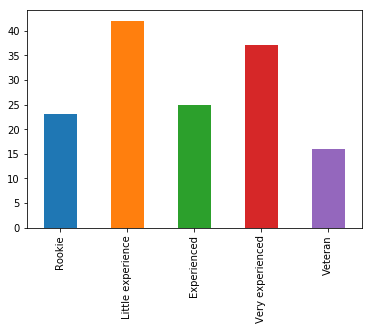

In [40]:
wnba["Exp_ordinal"].value_counts().iloc[[3,0,2,1,4]].plot.bar();

- Create a horizontal bar plot to visualize the distribution of the Exp_ordinal variable.
    - Generate a frequency table for the Exp_ordinal variable.
    - Sort the table by unique labels in an ascending order.
    - Use the Series.plot.barh() method to generate the horizontal bar plot.
    - Add the following title to the plot: Number of players in WNBA by level of experience.

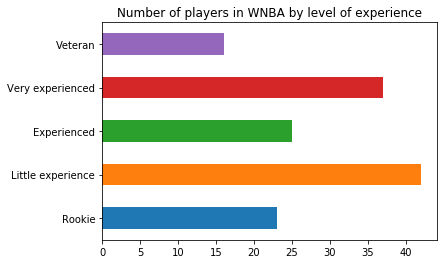

In [41]:
wnba["Exp_ordinal"].value_counts().iloc[[3,0,2,1,4]].plot.barh(title="Number of players in WNBA by level of experience");

- Generate a pie chart to visualize the distribution of the Exp_ordinal variable.
    - Generate a frequency table for the Exp_ordinal variable. Don't sort the table this time.
    - Use the Series.plot.pie() method to generate the pie plot.

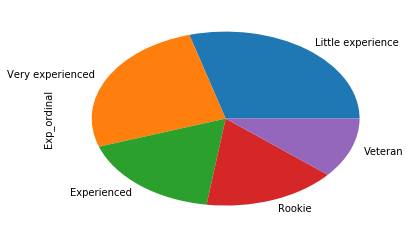

In [42]:
wnba["Exp_ordinal"].value_counts().plot.pie();

- Generate and customize a pie chart to visualize the distribution of the Exp_ordinal variable.
    - Generate a frequency table for the Exp_ordinal variable. Don't sort the table this time.
    - Use the Series.plot.pie() method to generate the pie plot.
        - Use the figsize parameter to specify a width and a height of 6 inches each.
        - Use the autopct parameter to have percentages displayed with a precision of 2 decimal places.
        - Add the following title to the plot: Percentage of players in WNBA by level of experience.
        - Remove the Exp_ordinal label.

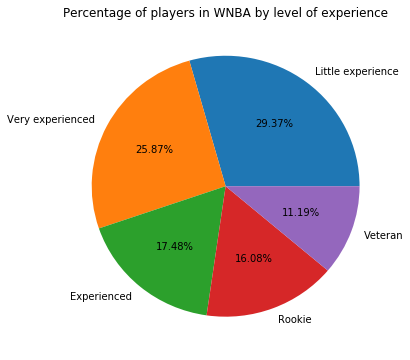

In [43]:
wnba["Exp_ordinal"].value_counts().plot.pie(figsize = (6,6), autopct = "%.2f%%", title="Percentage of players in WNBA by level of experience")
plt.ylabel("");

- Using Series.plot.hist(), generate a histogram to visualize the distribution of the PTS variable.

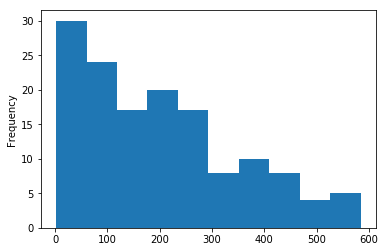

In [44]:
wnba["PTS"].plot.hist();

- Examine the distribution of the Games Played variable using the Series.describe() method. Just from the output of this method, predict how the histogram of the Games Played variable should look like.
- Once you have a good idea of what histogram shape to expect, plot a histogram for the Games Played variable using Series.plot.hist().

In [45]:
wnba["Games Played"].describe()

count    143.000000
mean      24.356643
std        7.104259
min        2.000000
25%       22.000000
50%       27.000000
75%       29.000000
max       32.000000
Name: Games Played, dtype: float64

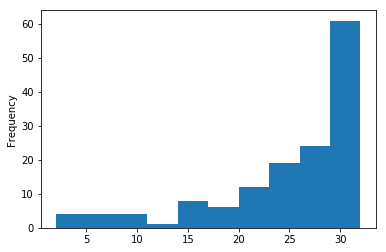

In [46]:
wnba["Games Played"].plot.hist();

- Generate and customize a histogram for the Games Played variable.
    - Each bin must cover an interval of 4 games. The first bin must start at 0, the last bin must end at 32.
    - Modify the tick labels of the x-axis such that each bin has its starting and ending point labeled.
    - Add the title "The distribution of players by games played".
    - Add a label to the x-axis named "Games played".

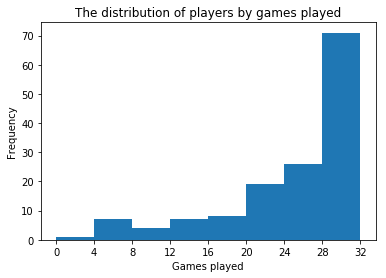

In [48]:
wnba['Games Played'].plot.hist(range = (0,32), bins = 8, xticks = range(0,33,4), title = 'The distribution of players by games played')
plt.xlabel('Games played');

- Examine the distribution of the following two variables:
    - AST (number of assists).
    - FT% (percentage of free throws made out of all attempts).
- Depending on the shape of the distribution, assign the string 'left skewed' or 'right skewed' to the following variables:
    - assists_distro for the AST column.
    - ft_percent_distro for the FT% column.

In [49]:
assists_distro = "right skewed"
ft_percent_distro = "left skewed"

- Examine the distribution of the following variables, trying to determine which one resembles the most a normal distribution:
    - Age
    - Height
    - MIN
- Assign to the variable normal_distribution the name of the variable (as a string) whose distribution resembles the most a normal one.

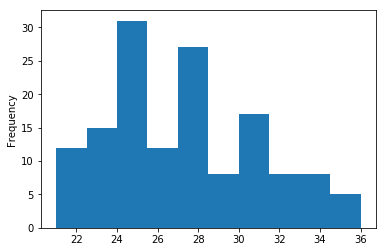

In [50]:
wnba["Age"].plot.hist();

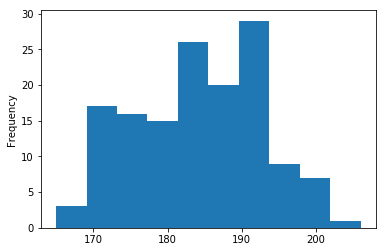

In [51]:
wnba["Height"].plot.hist();

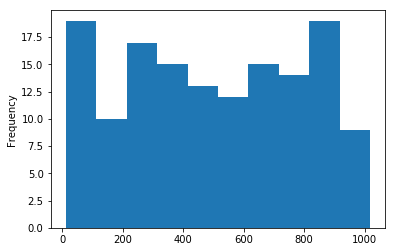

In [52]:
wnba["MIN"].plot.hist();

In [53]:
normal_distribution = "Height"

## Comparing Frequency Distributions

- For each segment, generate a frequency distribution table for the Pos variable.
    - For the rookies segment, assign the frequency distribution table to a variable named rookie_distro.
    - For the little experience segment, assign the table to little_xp_distro.
    - For the experienced segment, assign the table to experienced_distro.
    - For the very experienced segment, assign the table to very_xp_distro.
    - For the veterans segment, assign the table to veteran_distro.
- Print all the tables and analyze them comparatively to determine whether there are any clear patterns in the distribution of player position depending on the level of experience.

In [54]:
rookies = wnba[wnba['Exp_ordinal'] == 'Rookie']
little_xp = wnba[wnba['Exp_ordinal'] == 'Little experience']
experienced = wnba[wnba['Exp_ordinal'] == 'Experienced']
very_xp = wnba[wnba['Exp_ordinal'] == 'Very experienced']
veterans =  wnba[wnba['Exp_ordinal'] == 'Veteran']
rookie_distro = rookies['Pos'].value_counts()
little_xp_distro = little_xp['Pos'].value_counts()
experienced_distro = experienced['Pos'].value_counts()
very_xp_distro = very_xp['Pos'].value_counts()
veteran_distro = veterans['Pos'].value_counts()

print(rookie_distro, '\n\n', little_xp_distro, '\n\n', experienced_distro, '\n\n', very_xp_distro, '\n\n', veteran_distro)

G      14
C       4
F       4
F/C     1
Name: Pos, dtype: int64 

 G      14
F      13
C       8
F/C     4
G/F     3
Name: Pos, dtype: int64 

 G      9
C      6
F      6
G/F    2
F/C    2
Name: Pos, dtype: int64 

 G      16
F       6
C       6
G/F     5
F/C     4
Name: Pos, dtype: int64 

 G      7
F      4
G/F    3
F/C    1
C      1
Name: Pos, dtype: int64


- Using sns.countplot(), generate a grouped bar plot similar to the one above.
    - Place the Exp_ordinal variable on the x-axis.
    - Generate the bar plots for the Pos variable. The data set is stored in wnba variable.
    - Using the order parameter of sns.countplot(), order the values on the x-axis in ascending order. The order parameter takes in a list of strings, so you should use order = ['Rookie', 'Little experience', ..........].
    - Using the hue_order parameter, order the bars of each bar plot in ascending alphabetic order. hue_order takes in a list of strings, so you can use hue_order = ['C', 'F', ......].

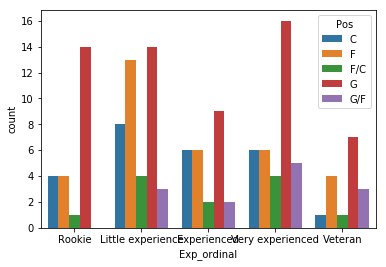

In [55]:
import seaborn as sns

sns.countplot(x="Exp_ordinal", hue="Pos", data=wnba,
              order=["Rookie", "Little experience", "Experienced", "Very experienced", "Veteran"],
              hue_order=["C", "F", "F/C", "G", "G/F"]);

- Generate a grouped bar plot to confirm or reject our hypothesis. Using sns.countplot():
    - Place the age_mean_relative variable on the x-axis. The age_mean_relative and min_mean_relative are already defined.
    - Generate the frequency distributions for the min_mean_relative variable.
- Analyze the graph and determine whether the data confirms or rejects our hypothesis. If it's a confirmation assign the string 'confirmation' to a variable named result. If it's a rejection, assign the string 'rejection' to the variable result.

In [57]:
wnba['age_mean_relative'] = wnba['Age'].apply(lambda x: 'old' if x >= 27 else 'young')
wnba['min_mean_relative'] = wnba['MIN'].apply(lambda x: 'average or above' if x >= 497 else 'below average')

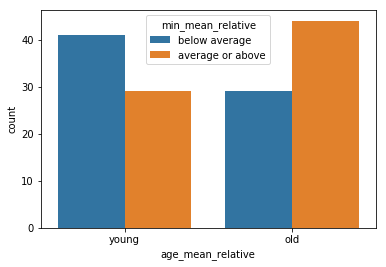

In [58]:
sns.countplot(x="age_mean_relative", hue="min_mean_relative", data=wnba);

In [59]:
result = "rejection"

- Looking on our graph above, it's not easy to visualize where the average number of minutes is. Using the plt.axvline() function, add a vertical line to demarcate the average point:
    - The vertical line should be at point 497 on the x-axis.
    - Use the label parameter of plt.axvline() to label it 'Average'. Display the label by running plt.legend().

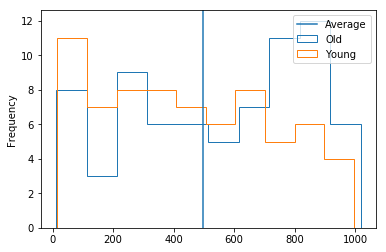

In [61]:
wnba[wnba.Age >= 27]['MIN'].plot.hist(histtype='step', label='Old', legend=True)
wnba[wnba.Age < 27]['MIN'].plot.hist(histtype='step', label='Young', legend=True)
plt.axvline(497, label='Average')
plt.legend();

- Reproduce the kernel density plots above, and add a vertical line to demarcate the average point.
    - The vertical line should be at point 497 on the x-axis.
    - Label the vertical line 'Average' and make sure the label is displayed in the legend.

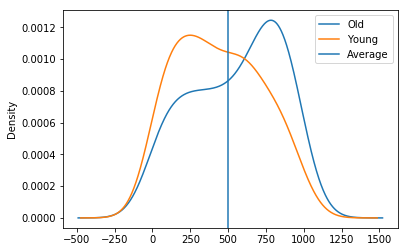

In [62]:
wnba[wnba.Age >= 27]['MIN'].plot.kde(label='Old', legend=True)
wnba[wnba.Age < 27]['MIN'].plot.kde(label='Young', legend=True)
plt.axvline(497, label='Average')
plt.legend();

- Using strip plots, examine the distribution of player weight (not height) as a function of player position. The graph should have the following properties:
    - The Pos variable in on the x-axis and the Weight variable on the y-axis.
    - Each strip plot has jitter added to it. The amount of jitter to apply is the one specific to jitter = True.

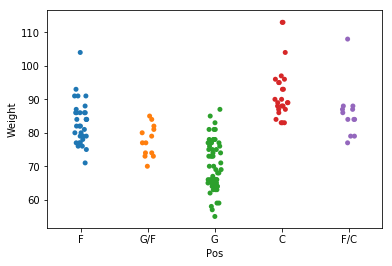

In [63]:
sns.stripplot(x='Pos', y='Weight', data=wnba, jitter=True);

- Using sns.boxplot(), generate a series of box plots to examine the distribution of player weight as a function of player position. Place the Pos variable on the x-axis and the Weight variable on the y-axis.

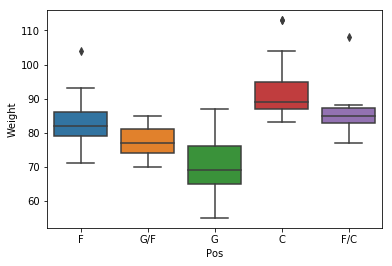

In [64]:
sns.boxplot(x="Pos", y="Weight", data=wnba);

- Consider the quartiles of the Games Played variable:
- Find the interquartile range, and assign the result to a variable named iqr.
- Using a factor of 1.5, calculate the lower and upper bound outside which values are considered outliers.
    - Assign the value of the lower bound to a variable named lower_bound.
    - Assign the upper bound to a variable named upper_bound.
- Find how many values in the distribution are outliers.
    - Assign the number of outliers below the lower bound to a variable named outliers_low.
    - Assign the number of outliers below the upper bound to a variable named outliers_high.
- Plot a boxplot to check whether your answers are sensible.

In [65]:
wnba["Games Played"].describe()

count    143.000000
mean      24.356643
std        7.104259
min        2.000000
25%       22.000000
50%       27.000000
75%       29.000000
max       32.000000
Name: Games Played, dtype: float64

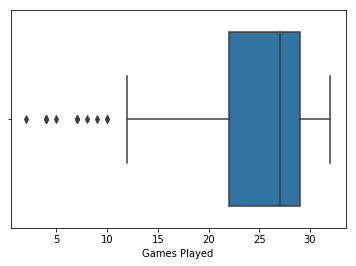

In [66]:
iqr = 29 - 22

lower_bound = 22 - (1.5*iqr)
upper_bound = 29 + (1.5*iqr)

outliers_low = sum(wnba["Games Played"] < lower_bound)
outliers_high = sum(wnba["Games Played"] > upper_bound)

sns.boxplot(wnba["Games Played"]);